In [2]:
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [3]:
# Huggingface veri setini yükle
dataset = load_dataset("Bena345/cdc-diabetes-health-indicators")

In [4]:
# Dataseti pandas DataFrame'e çevir
df = pd.DataFrame(dataset['train'])

In [5]:
# Categorical (metin) verilerin etiketlenmesi
# LabelEncoder kullanarak kategorik verileri sayısal verilere çeviriyoruz.
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [6]:
# Eksik verilerin doldurulması:
# Sayısal veriler için: Eksik değerleri sütun ortalamaları ile dolduruyoruz.
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

/var/folders/zp/n215vqkj39v_7v8r5wrq1rdw0000gn/T/ipykernel_5728/4001610092.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [7]:
 # Kategorik veriler için: Eksik değerleri sütunların mod (en sık tekrar eden değer) ile dolduruyoruz.
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
# Özellikler (X) ve hedef değişken (y) belirleniyor
X = df.drop(columns=['Diabetes_binary'])  # Özellikler
y = df['Diabetes_binary']  # Hedef değişken (Bu durumda diyabet durumu: 0 veya 1)

In [9]:
# Eğitim ve test verilerine ayırma (veri setinin %80'i eğitim, %20'si test için)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# XGBoost modelini başlatma
model = XGBClassifier(
    objective='binary:logistic',  # İki sınıflı sınıflandırma
    eval_metric='logloss',        # Logaritmik kayıp (log loss)
    use_label_encoder=False       # Etiket kodlayıcı ile ilgili uyarıları engeller
)


In [11]:
# Modeli eğitim verisiyle eğitme
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [19:30:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [17]:
# Test verisi üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Hedef değişkenin iki sınıfını tanımlıyoruz: 'No Diabetes' (0) ve 'Diabetes' (1)
target_names = ['No Diabetes', 'Diabetes']

In [13]:
# Modelin başarımını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print(f'Başarı Oranı (Accuracy): {accuracy:.4f}')

Başarı Oranı (Accuracy): 0.8651


In [20]:
# classification_report fonksiyonunu import et
from sklearn.metrics import classification_report

# Hedef değişkenin iki sınıfını tanımlıyoruz: 'No Diabetes' (0) ve 'Diabetes' (1)
target_names = ['No Diabetes', 'Diabetes']

# classification_report ile modelin performansını değerlendirme
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 No Diabetes       0.51      0.17      0.26      5279
    Diabetes       0.88      0.97      0.93     33686

    accuracy                           0.87     38965
   macro avg       0.69      0.57      0.59     38965
weighted avg       0.83      0.87      0.84     38965



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [19:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/var/folders/zp/n215vqkj39v_7v8r5wrq1rdw0000gn/T/ipykernel_5728/3912842879.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


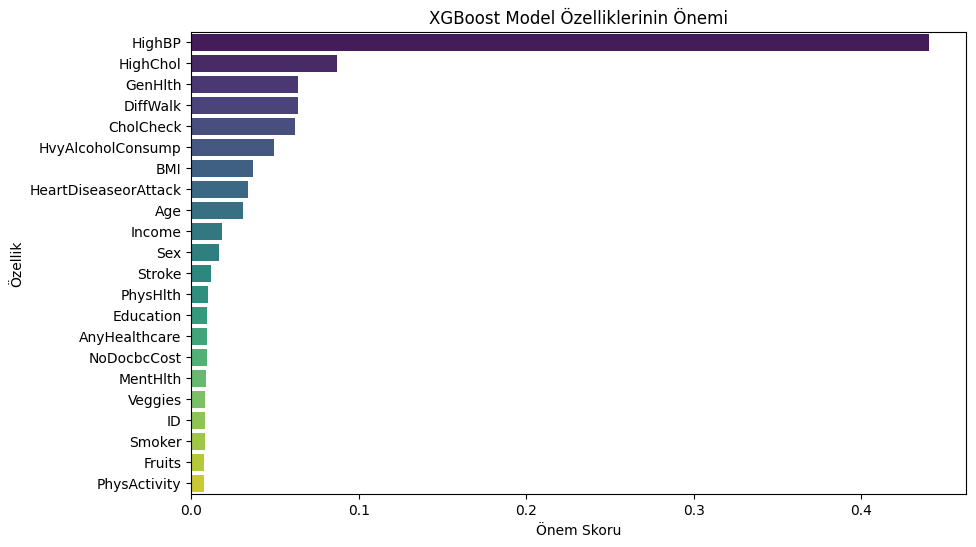

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from xgboost import XGBClassifier

# Modelin eğitilmesi
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Özelliklerin önem derecelerini alıyoruz
feature_importances = model.feature_importances_

# Özellik adlarını alıyoruz (X_train'deki sütun isimleri)
features = X_train.columns

# Visualizasyon için bir DataFrame oluşturuyoruz
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Veriyi, önem sırasına göre sıralıyoruz
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Özelliklerin önem derecelerini görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('XGBoost Model Özelliklerinin Önemi')
plt.xlabel('Önem Skoru')
plt.ylabel('Özellik')
plt.show()


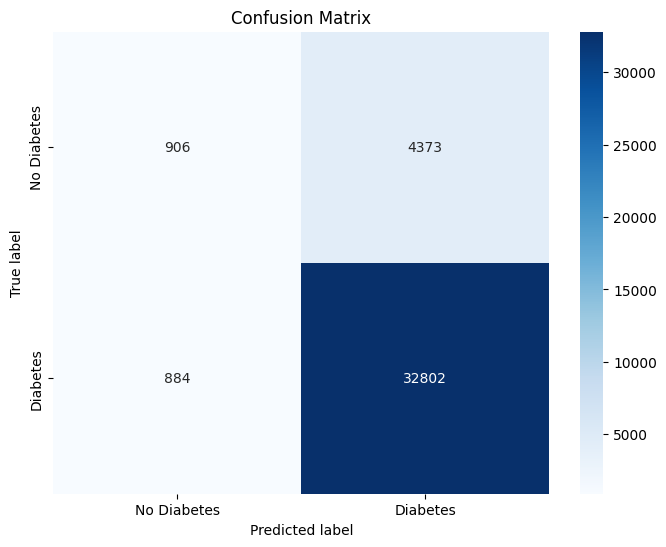

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Modelin tahminlerini yapma
y_pred = model.predict(X_test)

# Karışıklık matrisini hesaplama
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()
